<a href="https://colab.research.google.com/github/GopalKavhale/tcr_project/blob/main/TCR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bank Data Analysis
In this project, the Bank Marketing Dataset was used to build a model that can predict, based on a number of attributes, whether or not a person will make a deposit. The models below are used to build, evaluate, and compare which one is the best:

1.Decision Tree Model
2.Random Forest Model
3.Naive Bayes Model
4.K-Nearest Neighbors Model

In [ ]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [ ]:
#  dataset upload
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
df_bank = pd.read_csv('bank-full.csv')
df_bank.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [ ]:
#Conversion of dataset into structured format
df_bank = pd.read_csv('bank-full.csv', delimiter=';')

In [ ]:
#To set dataset in shape
df_bank.shape

(45211, 17)

In [ ]:
# classify data in structured formate
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Finding missing values
#Checking Missing Values
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# Data info
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Finding unique data
df_bank.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [ ]:
# Find mean, max, min, std
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Text(0.5, 1.0, 'Age Distribution')

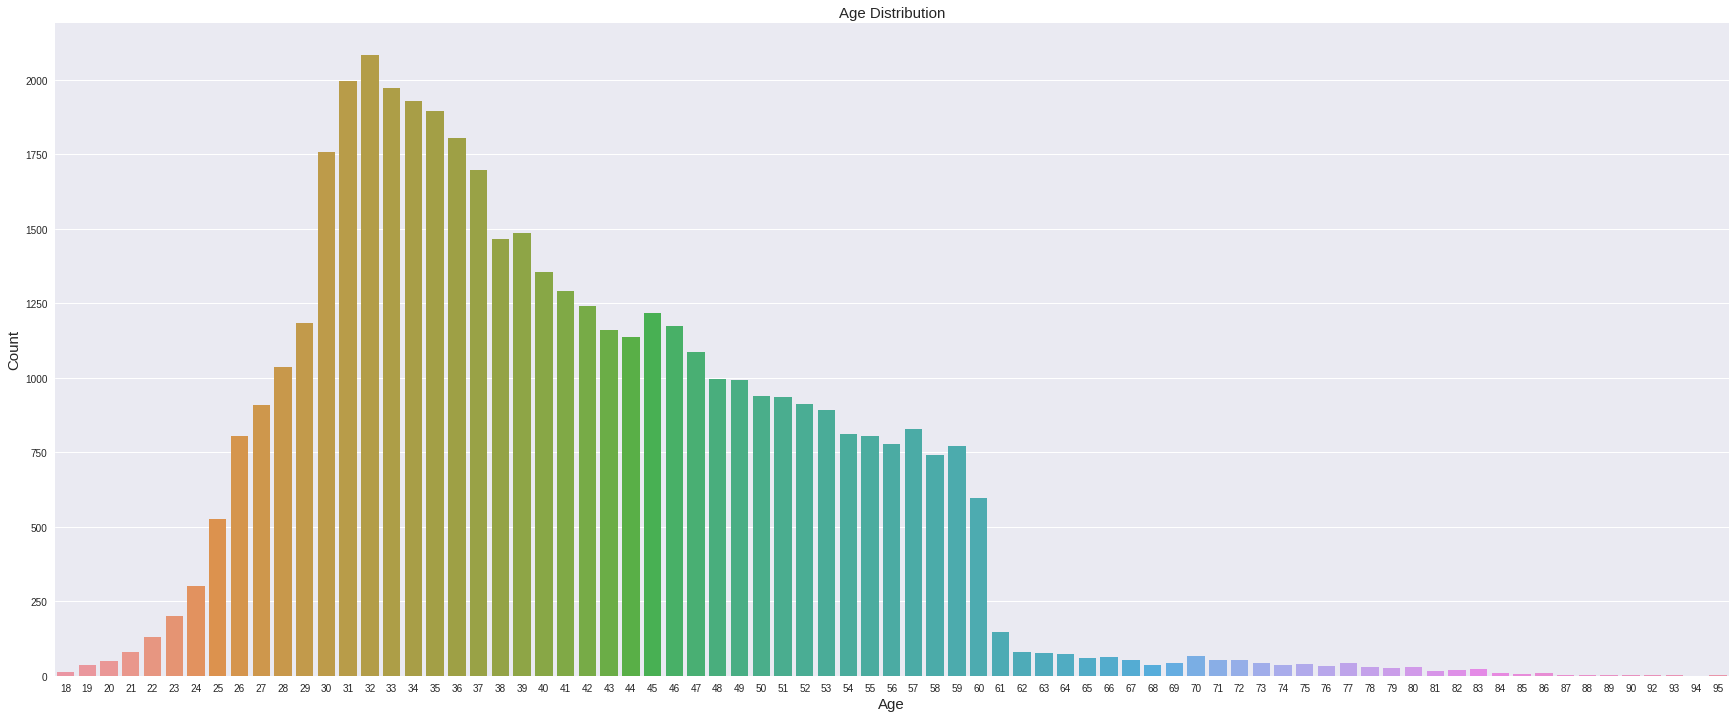

In [ ]:
# Checking for outlier
plt.figure(figsize = (30,12))
sns.countplot(x = 'age', data = df_bank)
plt.xlabel("Age", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Distribution', fontsize=15)

Text(0.5, 1.0, 'Job Distribution')

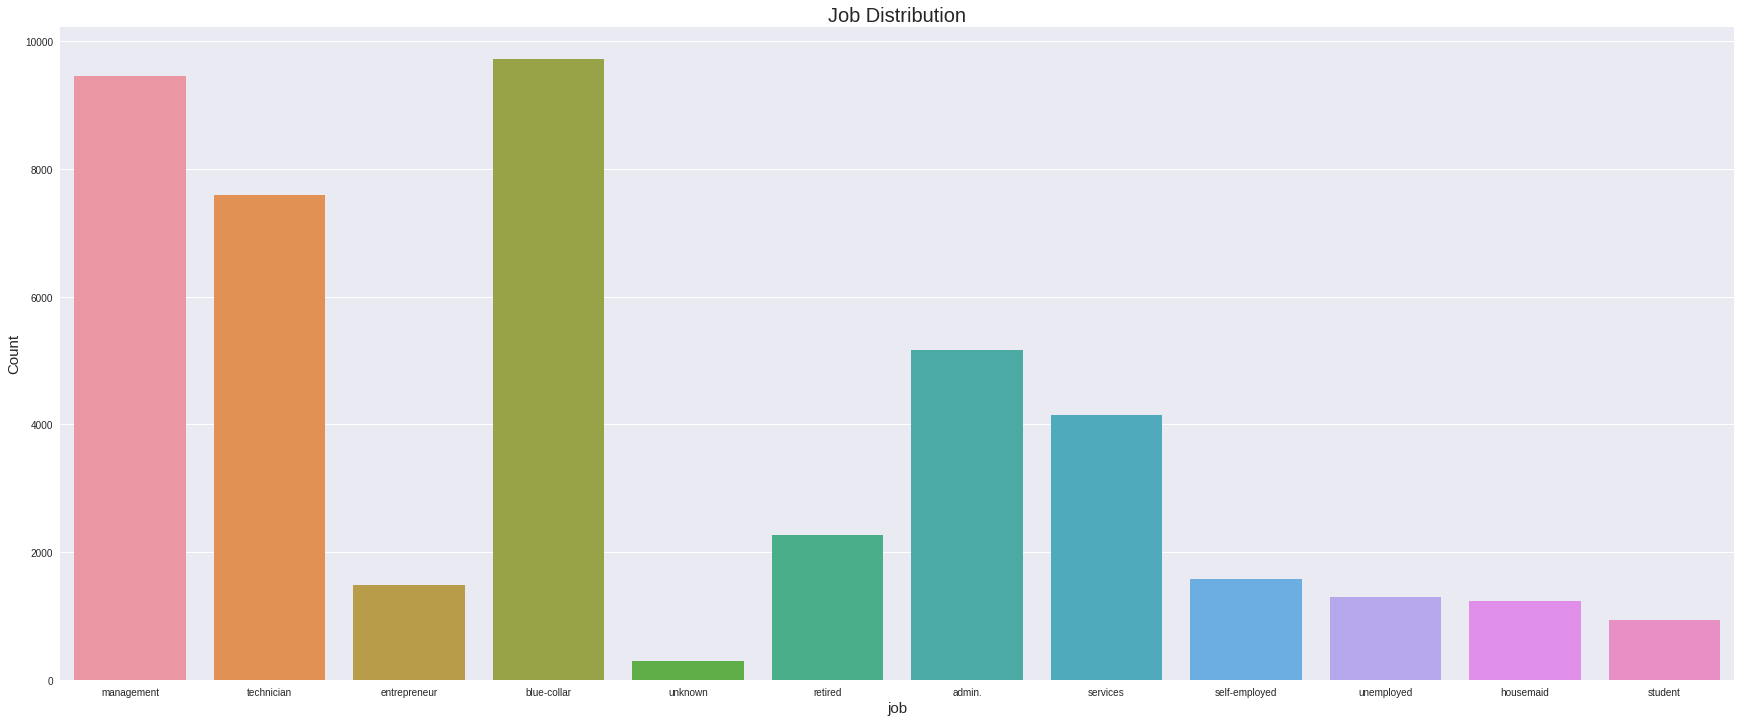

In [ ]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'job',data = df_bank)
plt.xlabel("job", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Job Distribution', fontsize=20)

Text(0.5, 1.0, 'Marital Distribution')

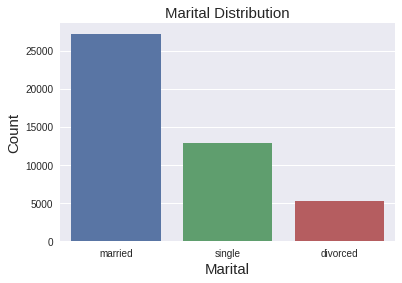

In [ ]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'marital',data = df_bank)
plt.xlabel("Marital", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Marital Distribution', fontsize=15)

Text(0.5, 1.0, 'Education Distribution')

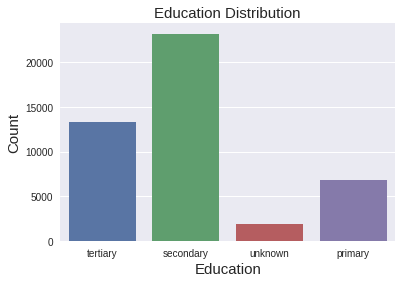

In [ ]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'education',data = df_bank)
plt.xlabel("Education", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Education Distribution', fontsize=15)

Text(0.5, 1.0, 'Default Distribution')

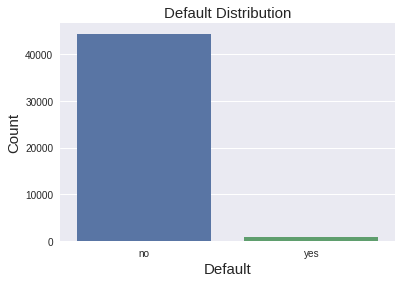

In [ ]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'default',data = df_bank)
plt.xlabel("Default", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Default Distribution', fontsize=15)

Text(0.5, 1.0, 'Housing Distribution')

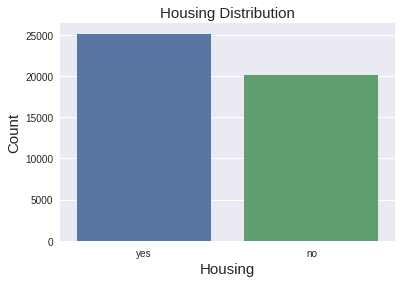

In [ ]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'housing',data = df_bank)
plt.xlabel("Housing", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Housing Distribution', fontsize=15)

Text(0.5, 1.0, 'Loan Distribution')

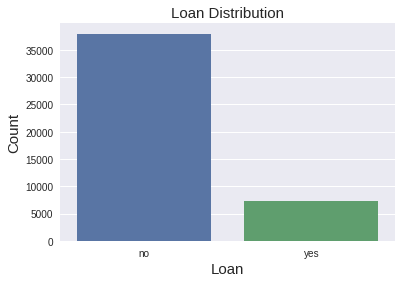

In [ ]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'loan',data = df_bank)
plt.xlabel("Loan", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Loan Distribution', fontsize=15)

Text(0.5, 1.0, 'Contact Distribution')

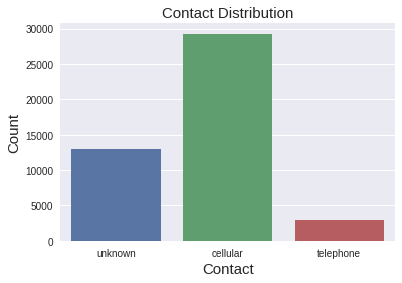

In [ ]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'contact',data = df_bank)
plt.xlabel("Contact", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Contact Distribution', fontsize=15)

Text(0.5, 1.0, 'Monthly Distribution')

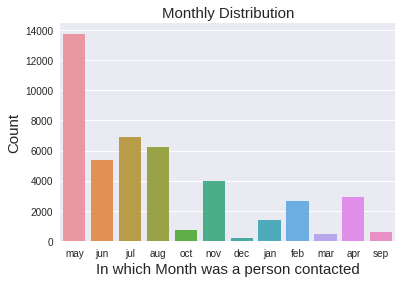

In [ ]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'month',data = df_bank)
plt.xlabel("In which Month was a person contacted", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Distribution', fontsize=15)

In [ ]:
#To delete un-wanted data
#Drop 'duration' column
df_bank = df_bank.drop('duration', axis=1)

# print(df_bank.info())
print('Shape of dataset:', df_bank.shape)
df_bank.head()

Shape of dataset: (45211, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


no     39922
yes     5289
Name: y, dtype: int64


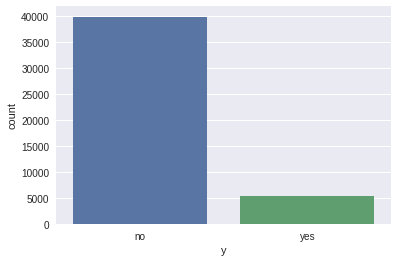

In [ ]:
#To count values of y and n
print(df_bank.y.value_counts())
axes1 = sns.countplot(x='y', data=df_bank)

In [ ]:
from sklearn.preprocessing import StandardScaler

# For Copying original dataframe
df_bank_ready = df_bank.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank_ready[num_cols] = scaler.fit_transform(df_bank_ready[num_cols])

df_bank_ready.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no


In [ ]:
from sklearn.preprocessing import StandardScaler

# copy original dataframe to df_bank_numerical
df_bank_num = df_bank.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank_num[num_cols] = scaler.fit_transform(df_bank_num[num_cols])
df_bank_num = df_bank_num.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'], axis=1)
df_bank_num.head()

,age,balance,day,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.569351,-0.411453,-0.25194


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
catg_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# copy original dataframe to df_bank_numerical
df_bank_targ = df_bank.copy()

# Encode target value
df_bank_targ['y'] = df_bank_targ['y'].apply(lambda x: 1 if x == 'yes' else 0)

df_bank_targ = df_bank_targ.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome'], axis=1)
df_bank_targ.head(15)

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
catg_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# copy original dataframe to df_bank_numerical
df_bank_catg = df_bank.copy()

df_bank_catg.head()
# Encode categorical Data to Numerical
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank_catg[catg_cols]))
df_encoded.columns = encoder.get_feature_names(catg_cols)

# Replace Categotical Data with Encoded Data
df_bank_catg = df_bank_catg.drop(catg_cols ,axis=1)
df_bank_catg = pd.concat([df_bank_num, df_encoded, df_bank_targ], axis=1)

print('Shape of dataframe:', df_bank_catg.shape)
df_bank_catg.head()

Shape of dataframe: (45211, 51)


,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,1.606965,0.256419,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.288529,-0.437895,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,-0.747384,-0.446762,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.571051,0.047205,-1.298476,-0.569351,-0.411453,-0.25194,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.747384,-0.447091,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
# Select Features
feature = df_bank_catg.drop('y', axis=1)

# Select Target
target = df_bank_catg['y']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (36168, 50)
Shape of testing feature: (9043, 50)
Shape of training label: (36168,)
Shape of training label: (9043,)


In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Prediction of Test Data 
    y_pred = model.predict(x_test)

    # to calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
from sklearn import tree

# coding for Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Evaluate decision Model 
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.83125069114232
Precision: 0.3045977011494253
Recall: 0.35333333333333333
F1 Score: 0.32716049382716045
Cohens Kappa Score: 0.2312928830679437
Area Under Curve: 0.6236828057883982
Confusion Matrix:
 [[7146  847]
 [ 679  371]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Evaluate Random Forest Model 
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.8930664602454937
Precision: 0.5954022988505747
Recall: 0.24666666666666667
F1 Score: 0.3488215488215488
Cohens Kappa Score: 0.3012918131367428
Area Under Curve: 0.7833722364211544
Confusion Matrix:
 [[7817  176]
 [ 791  259]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Evaluate Naive Bayes Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.8413137233219065
Precision: 0.3555888972243061
Recall: 0.4514285714285714
F1 Score: 0.3978178766261016
Cohens Kappa Score: 0.3079153046567207
Area Under Curve: 0.748110310807671
Confusion Matrix:
 [[7134  859]
 [ 576  474]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Evaluate KNN Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.8870949906004645
Precision: 0.5333333333333333
Recall: 0.22095238095238096
F1 Score: 0.3124579124579125
Cohens Kappa Score: 0.26227398263972534
Area Under Curve: 0.7023247126950367
Confusion Matrix:
 [[7790  203]
 [ 818  232]]


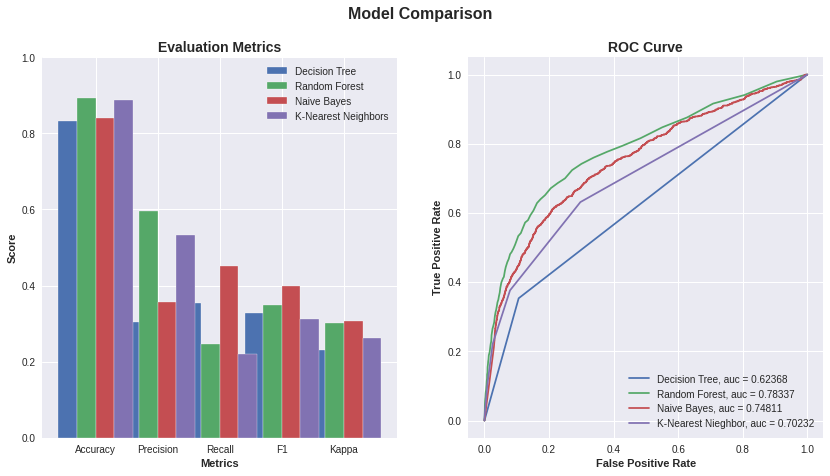

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.3
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()